<a href="https://colab.research.google.com/github/mwele/applied_ai_code/blob/master/day_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install kaggle --upgrade
import numpy as np
import pylab
import scipy.stats as stats
import matplotlib.pyplot as plt 
import pandas as pd
#d0=pd.read_csv('mnist_train.csv')

SyntaxError: ignored

# New Section

In [ ]:
l=d0['label']
d=d0.drop("label",axis=1)
labels=l.head(60000)
data=d.head(60000)
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(data)
print(standardized_data.shape)
import numpy as np
# find the co-variance matrix which is: A^T*T
sampled_data=standardized_data

(60000, 784)


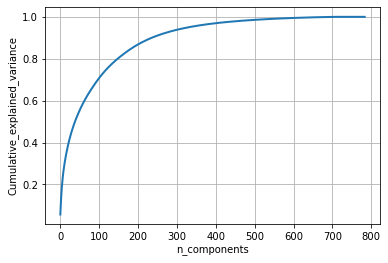

In [ ]:
# PCA for dimensionality reduction (non-visualization)
from sklearn import decomposition
pca=decomposition.PCA()

pca.n_components=784
pca_data=pca.fit_transform(sampled_data)
percentage_var_explained=pca.explained_variance_/np.sum(pca.explained_variance_)
cum_var_explained=np.cumsum(percentage_var_explained)
#plot the pca spectrum
plt.figure(1,figsize=(6,4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [ ]:
from sklearn.manifold import TSNE
#picking the top 1000 points as TSNE takes a lot of time for 60k points
labels=l.head(60000)
data=d.head(60000)

In [ ]:
model=TSNE(n_components=2,random_state=0)
#configuring the parameters 
# the number of components =2
# default perplexity =30
#default learning arte =200
# to get consisted answers random state=0 since tsne is a probablistic algorithm
# default max number of iterations for the optimization =1000
tnse_data=model.fit_transform(data)
#creating a new data frame which help us in plotting the result data
tsne_data=np.vstack((tsne_data.T, labels)).T
tsne_df=pd.DataFrame(data=tsne_data, columns=("Dim_1","Dim_2","label"))
#plotting the result of tsnetGrid()t
sns.FaceGrid(tsne_df, hue="label", size=6).map(plt.scatter,"Dim_1","Dim_2")
plt.show()